In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def ROI_mask_overlap(neuron_array,all_nz_cal_act, img_path):
    import os
    import sys
    import tifffile

    l_dim = len(neuron_array[0])
    mask = tifffile.imread(img_path)
    #np.save('/content/drive/MyDrive/test_mask.npy', mask)
    print(np.shape(neuron_array))
    neuron_arr = np.zeros(len(neuron_array))
    for i in np.arange(len(neuron_array)):
        o_product = np.multiply(mask,neuron_array[i])
        o_sum = np.sum(o_product)
        if o_sum > 0:
            neuron_arr[i] = 1
    pt_neuron_arr_ind = np.nonzero(neuron_arr)
    nz_cal_act = all_nz_cal_act[pt_neuron_arr_ind[0],:]
    nz_neuron_array = np.zeros((len(pt_neuron_arr_ind),l_dim,l_dim))
    for i in pt_neuron_arr_ind:
        nz_neuron_array = neuron_array[i]
    return nz_cal_act, nz_neuron_array, mask

In [40]:
plane_index = 1
all_nz_cal_act = np.load(f'data/p{plane_index}/all_nz_cal_act.npy')
all_nz_neuron_array = np.load(f"data/p{plane_index}/all_nz_neuron_array.npy")
mask_path = f'data/p{plane_index}/Mask.tif'


#all_nz_cal_act are your calcium activities and all_nz_neuron_array are the spatial coordinates for the neurons.
pt_neurons_cal_act_and_array = ROI_mask_overlap(all_nz_neuron_array,all_nz_cal_act, mask_path)

(967, 411, 411)


In [41]:
pt_neuron_array = pt_neurons_cal_act_and_array[1]
print(np.shape(pt_neuron_array))
mask = pt_neurons_cal_act_and_array[2]

(324, 411, 411)


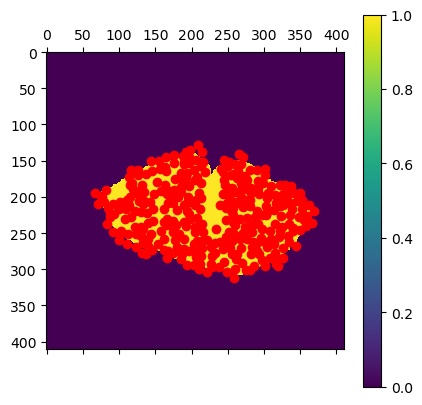

In [42]:
mean_coord = np.zeros((np.shape(pt_neuron_array)[0], 2))
for neuron in range(np.shape(pt_neuron_array)[0]):#np.shape(pt_neuron_array)[0]
    mean_x = 0
    mean_y = 0
    coordinate_record = np.where(pt_neuron_array[neuron] > 0)
    #print(pt_neuron_array[neuron, coordinate_record[0][1], coordinate_record[1][1]])
    #print(coordinate_record[0][1], coordinate_record[1][1])
    #print(np.shape(coordinate_record))
    loc_record = pt_neuron_array[neuron, coordinate_record[0], coordinate_record[1]]
    assert(loc_record.all() == 1)
    mean_y = np.mean(coordinate_record[0])
    mean_x = np.mean(coordinate_record[1])
    mean_coord[neuron] = np.array([mean_x, mean_y])
plt.matshow(mask)
plt.scatter(mean_coord[:,0], mean_coord[:, 1], color = 'red')
plt.colorbar()
plt.show()


In [82]:
umap_res = np.load('umap_out.npy')

7.4319177


KeyboardInterrupt: 

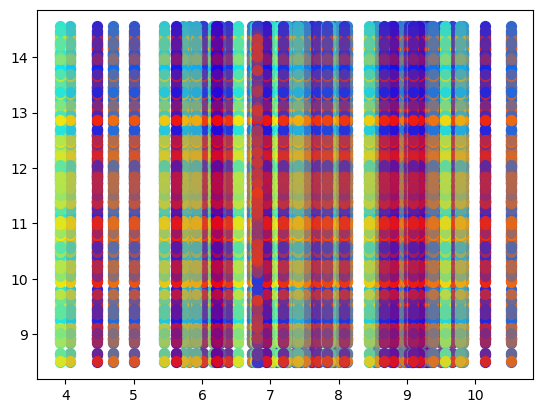

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
u_x = umap_res[:,0]
u_y = umap_res[:,1]

x = mean_coord[:,0]
y = mean_coord[:, 1]

# Define the colors corresponding to the corners
bottom_left_color = (0, 0, 1)  # Blue
bottom_right_color = (0, 1, 1)  # Cyan
top_left_color = (1, 0, 0)  # Red
top_right_color = (1, 1, 0)  # Yellow

# Create a figure and axis
fig, ax = plt.subplots()
print(u_x[1])
# Plot each point with its assigned color
for i in range(len(u_x)):
    for j in range(len(u_y)):
        x_ratio = (x[i] - np.min(x)) / (np.max(x) - np.min(x))
        y_ratio = (y[j] - np.min(y)) / (np.max(y) - np.min(y))

        r = (1 - y_ratio) * ((1 - x_ratio) * bottom_left_color[0] + x_ratio * bottom_right_color[0]) + \
            y_ratio * ((1 - x_ratio) * top_left_color[0] + x_ratio * top_right_color[0])

        g = (1 - y_ratio) * ((1 - x_ratio) * bottom_left_color[1] + x_ratio * bottom_right_color[1]) + \
            y_ratio * ((1 - x_ratio) * top_left_color[1] + x_ratio * top_right_color[1])

        b = (1 - y_ratio) * ((1 - x_ratio) * bottom_left_color[2] + x_ratio * bottom_right_color[2]) + \
            y_ratio * ((1 - x_ratio) * top_left_color[2] + x_ratio * top_right_color[2])

        color = (r, g, b)
        #print(color)
        ax.scatter(u_x[i], u_y[j], c=[color], s=50)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with Assigned Colors')

# Show the plot
plt.show()


(324, 2)


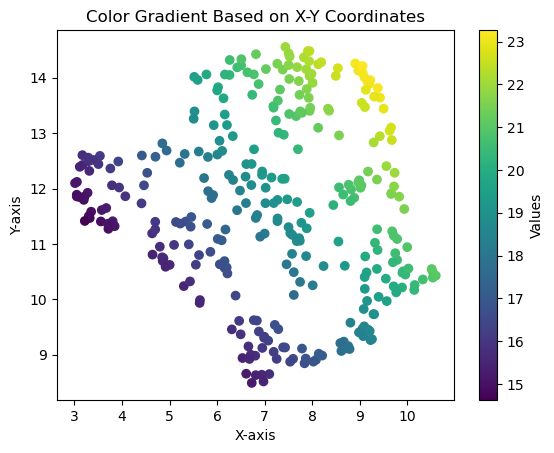

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 0, 0.5),   # Dark blue
    (0, 0, 1),     # Light blue
    (1, 0, 0),     # Dark red
    (1, 0, 0.5)]  # Blue, Green, Red
n_bins = [10, 10, 10, 10]  # Number of bins for each color channel
cmap_name = "custom_color_map"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=sum(n_bins))

# x = np.linspace(0, 5, 50)
# y = np.linspace(5, 0, 50)
x = umap_res[:,0]
print(np.shape(umap_res))
y = umap_res[:,1]
X, Y = np.meshgrid(mean_coord[:, 0], mean_coord[:, 1])
#X, Y = np.meshgrid(x, y)
#print(np.shape(X), np.shape(Y))
# Generate sample values based on x-y coordinates
values = x+y

fig, ax = plt.subplots()

# Plot the dots with the color gradient
scatter = ax.scatter(x, y, c=values, cmap='viridis')

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Values')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Color Gradient Based on X-Y Coordinates')

# Show the plot
plt.show()